## **Introduction**
The goal of this notebook is to provide analysis and insights that can be obtained from how to analyze and interpret historical stock prices and their plots.  I obtained the stock historical data by using the Pandas library DataReader.  DataReader is capable of reading stock APIs suchas Quandl, NASDAQ. The library provide price and volumne information regarding a stock. I will use mainly the Adjusted Closing Price. <br> 
In addition, I will examine how Long Short Term Memory (LSTM )alogorithms and SARIMA models can be used based on the Adjusted Closing Price of stock to forecast the next day price of a stock.<br>
I will analyze stocks using several key measurements.  for the following pharmaceutical companies that are developing a COVID-19 vaccine.Pfizer(PFE),Johnson & Johnson(JNJ),Moderna (MRNA), Novavax (NVAX),BioNTech SE(BNTX),MERCK & Co.(MRK)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import plotly.express as px

import pandas_datareader.data as web

from keras.callbacks import EarlyStopping

import keras
from keras.models import load_model

#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from textblob import TextBlob 
from wordcloud import WordCloud 

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

Using Theano backend.


### **Single Stock Data and Plot**
The function will take as an input any of the below column.  I will utilize mainly the Adjusted Closing Price (Adj Close).  
The closing price of a stock is the price of that stock at the close of the trading day. The adjusted closing price uses the closing price as a starting point, but it also takes into account factors such as dividends, stock splits and new stock offerings to determine a value. The adjusted closing price represents a more accurate reflection of a stock's value, since distributions and new offerings can alter the closing price.<br>



In [2]:
def single_stock_data(symbol, start,end,plot=True,stock_value='Adj Close'):
    
    try:
        
        df = web.DataReader(symbol,'yahoo', start, end)
        df_single = pd.DataFrame(df)
        print("Dataframe has {} rows and {} columns".format(df_single.shape[0],df_single.shape[1]))
        print()
        print(df_single)
        if plot==True:
            plt.figure(figsize=(12,8))
            plt.plot(df_single[stock_value])
            label_font = {'weight':'bold','size':18}
            plt.xlabel('Date',fontdict=label_font)
            plt.ylabel('Close Price USD ($)',fontdict=label_font)
            plt.title(f'Historical {stock_value} Price for {symbol}',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
 
        return df_single

    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


Dataframe has 310 rows and 6 columns

                 High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2019-10-10  16.698999  13.010000  16.500000  14.240000  2805800  14.240000
2019-10-11  15.340000  13.500000  15.340000  13.820000  1364300  13.820000
2019-10-14  13.910000  12.525000  13.830000  12.750000   899100  12.750000
2019-10-15  13.000000  12.530000  12.990000  12.920000   484700  12.920000
2019-10-16  13.880000  12.610000  13.200000  12.940000   524200  12.940000
...               ...        ...        ...        ...      ...        ...
2020-12-24  99.889999  96.639999  98.500000  96.959999  1039100  96.959999
2020-12-28  95.400002  87.070000  95.000000  88.110001  4698900  88.110001
2020-12-29  89.389999  83.852997  84.449997  88.279999  3300400  88.279999
2020-12-30  90.889999  83.027000  90.000000  83.940002  2941100  83.940002
2020-12-31  85.500000  80.550003  83.379997  81.519997  259900

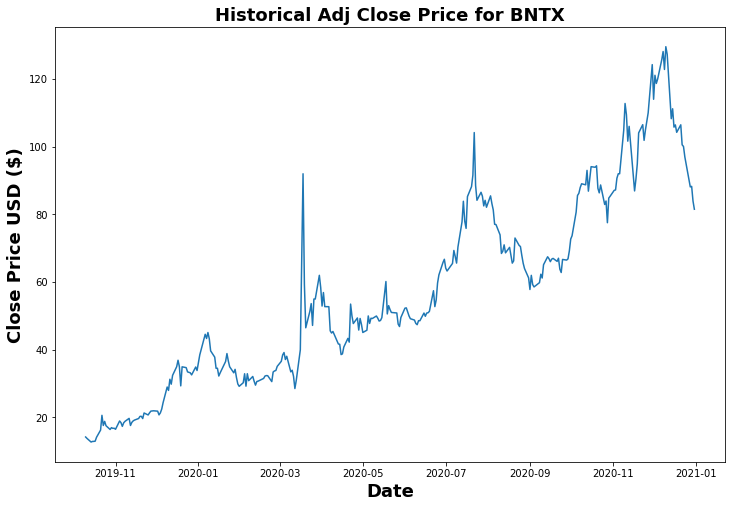

In [3]:
df_1 = single_stock_data('BNTX', start='2019',end='2021',plot=True,stock_value='Adj Close')

### **Multiple Stock Data and Plot**

In [4]:
"""
Pfizer(PFE) 
Roche(RO)  
Novartis(NOVN)
Merck(MRK)    
GlaxoSmithKline(GSK) 
Johnson & Johnson(JNJ) 

Moderna (MRNA)
Novavax (NVAX)
"""
def multiple_stock_data(ticker=None, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            plt.title("Stock Adjusted Price Historical Data")
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


Symbols,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2019-01-02,37.603287,120.959183,39.400002,15.330000,35.559563,NaN
2019-01-03,36.551258,119.037086,40.799999,15.500000,36.058155,NaN
2019-01-04,37.385921,121.034927,42.799999,16.959999,36.857777,NaN
2019-01-07,37.585892,120.258514,45.200001,16.270000,36.481483,NaN
2019-01-08,37.759781,123.051704,46.000000,16.950001,35.870007,NaN
...,...,...,...,...,...,...
2020-12-24,36.868916,152.470001,129.339996,123.389999,48.520000,96.959999
2020-12-28,36.423756,153.190002,116.849998,111.400002,49.380001,88.110001
2020-12-29,36.651279,154.139999,120.269997,114.389999,49.900002,88.279999


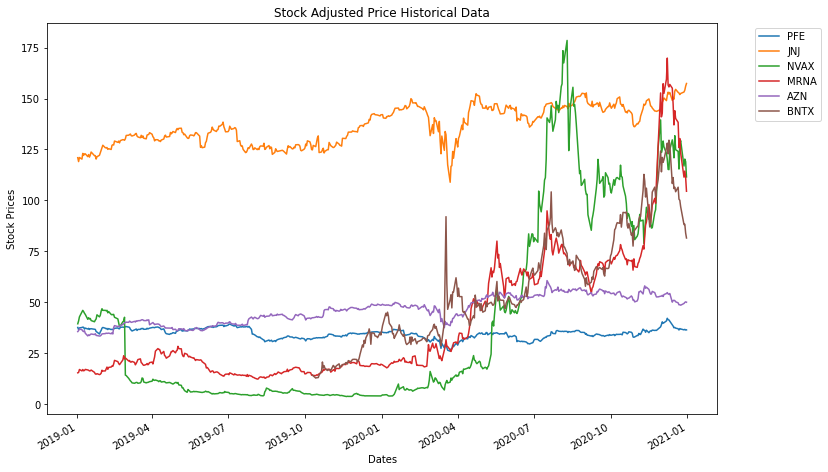

In [5]:
df_1 = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2019',end='2021',plot=True, stock_value='Adj Close')
df_1

In [38]:
#df_1 = single_stock_data('PFE', start='2019',end='2021',plot=True,stock_value='Adj Close')

### **Rolling Means (or Moving Averages)**
Why is rolling mean used?  Rolling mean (or moving averages) are used to smooth out short-term fluctuations in time series data and highlight long-term trends.  The rolling mean smooths out price data by creating a constantly updated average price.<br>
Each datapoint in the moving average column will be calculated on 30 items in the Adj Close column.  The moving average smoothes out the variations in the dataset.

In [7]:
df_data = single_stock_data('PFE', start='2019',end='2021',plot=False,stock_value='Adj Close')

Dataframe has 505 rows and 6 columns

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2019-01-02  41.271347  40.455406  40.910816  41.034157  26430315.0  37.603287
2019-01-03  41.119545  39.800758  41.024670  39.886147  28503533.0  36.551258
2019-01-04  41.129032  40.094875  40.265656  40.796963  27145348.0  37.385921
2019-01-07  41.385201  40.664139  40.863377  41.015179  20995469.0  37.585892
2019-01-08  41.461102  40.939278  41.328274  41.204933  19677231.0  37.759781
...               ...        ...        ...        ...         ...        ...
2020-12-24  37.570000  37.180000  37.400002  37.270000  14790100.0  36.868916
2020-12-28  37.580002  36.680000  37.360001  36.820000  26993700.0  36.423756
2020-12-29  37.200001  36.790001  36.900002  37.049999  23152100.0  36.651279
2020-12-30  37.240002  36.700001  37.029999  36.740002  24889800.0  36.344620
2020-12-31  36.919998  36.

In [8]:
df_data['Adj_Close_Price_30'] = df_data['Adj Close'].rolling(window=30).mean()
#sma_30 = pd.DataFrame(sma_30)

In [9]:
df_data

,High,Low,Open,Close,Volume,Adj Close,Adj_Close_Price_30
Date,,,,,,,
2019-01-02,41.271347,40.455406,40.910816,41.034157,26430315.0,37.603287,NaN
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,NaN
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,NaN
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,NaN
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,NaN
...,...,...,...,...,...,...,...
2020-12-24,37.570000,37.180000,37.400002,37.270000,14790100.0,36.868916,37.840841
2020-12-28,37.580002,36.680000,37.360001,36.820000,26993700.0,36.423756,37.880207
2020-12-29,37.200001,36.790001,36.900002,37.049999,23152100.0,36.651279,37.893681


In [10]:
df_data['Adj_Close_Price_100'] = df_data['Adj Close'].rolling(window=100).mean()
#sma_30 = pd.DataFrame(sma_100)
df_data

,High,Low,Open,Close,Volume,Adj Close,Adj_Close_Price_30,Adj_Close_Price_100
Date,,,,,,,,
2019-01-02,41.271347,40.455406,40.910816,41.034157,26430315.0,37.603287,NaN,NaN
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,NaN,NaN
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,NaN,NaN
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,NaN,NaN
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-24,37.570000,37.180000,37.400002,37.270000,14790100.0,36.868916,37.840841,35.532840
2020-12-28,37.580002,36.680000,37.360001,36.820000,26993700.0,36.423756,37.880207,35.539876
2020-12-29,37.200001,36.790001,36.900002,37.049999,23152100.0,36.651279,37.893681,35.550860


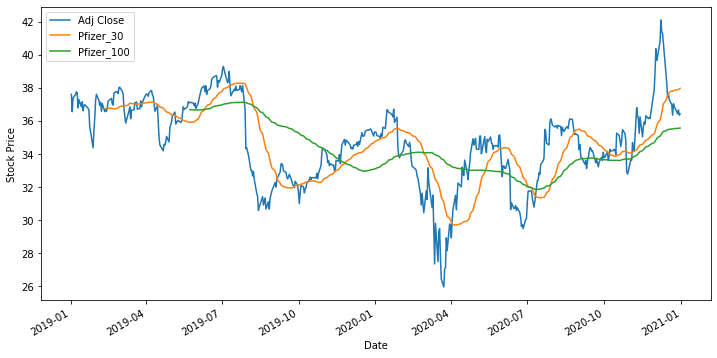

In [11]:
df_data['Adj Close'].plot(label='Adj Close',figsize=(12,6))
df_data['Adj_Close_Price_30'].plot(label='Pfizer_30',figsize=(12,6))
df_data['Adj_Close_Price_100'].plot(label='Pfizer_100',figsize=(12,6))
plt.ylabel("Stock Price")
plt.legend();

In [39]:
def plot_rolling_mean(df_data, col=None,col30=None,col100=None):
    df_data[col].plot(label='Adj Close',figsize=(12,6))
    df_data[col30].plot(label='Pfizer_30',figsize=(12,6))
    df_data[col100].plot(label='Pfizer_100',figsize=(12,6))
    plt.ylabel("Stock Price")
    plt.legend();

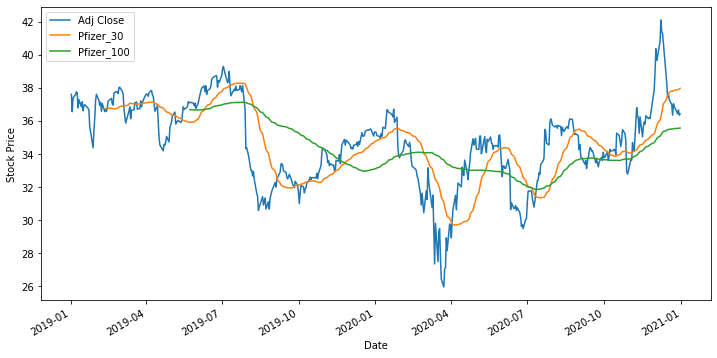

In [41]:
plot_rolling_mean(df_data, col='Adj Close', col30='Adj_Close_Price_30',col100='Adj_Close_Price_100')

In [12]:
# def buy_sell(data):
#     sig_price_buy=[]
#     sig_price_sell=[]
#     flag = -1
    
#     for i in range(len(data)):
#         if data['Adj_Close_Price_30'][i] > data['Adj_Close_Price_100']
#             if flag != 1:
#                 sig_price_buy

### Simple Daily return 
Simple daily return for each stock. 1 is for 1 day.

In [13]:
(36.551258/37.60328) - 1

-0.02797686797534682

In [14]:
def simple_daily_return(symbol, start,end,plot=True,stock_value='Adj Close'):
    
    try:
        
        df = web.DataReader(symbol,'yahoo', start, end)[stock_value]
        df_single = pd.DataFrame(df)
        sdr = df_single.pct_change(1)
        sdr = sdr.dropna()
        sdr.rename(columns={"Adj Close": "Price Change"},inplace=True)

        if plot==True:
            plt.figure(figsize=(12,8))
            plt.plot(sdr['Price Change'])
            label_font = {'weight':'bold','size':18}
            plt.xlabel('Date',fontdict=label_font)
            plt.ylabel('Close Price USD ($)',fontdict=label_font)
            plt.title(f'Historical Price Change for {symbol}',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
 
        return sdr

    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


,Price Change
Date,
2019-01-03,-0.027977
2019-01-04,0.022835
2019-01-07,0.005349
2019-01-08,0.004626
2019-01-09,-0.002072
...,...
2020-12-24,-0.004541
2020-12-28,-0.012074
2020-12-29,0.006247


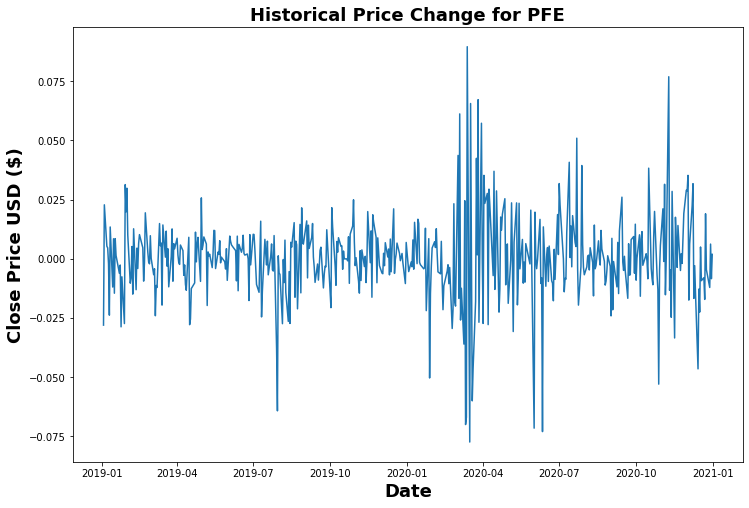

In [35]:
sdsingle = simple_daily_return('PFE', start='2019',end='2021',plot=True,stock_value='Adj Close')
sdsingle

In [36]:
df_1 = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2019',end='2021',plot=False, stock_value='Adj Close')
df_1

Symbols,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2019-01-02,37.603287,120.959183,39.400002,15.330000,35.559563,NaN
2019-01-03,36.551258,119.037086,40.799999,15.500000,36.058155,NaN
2019-01-04,37.385921,121.034927,42.799999,16.959999,36.857777,NaN
2019-01-07,37.585892,120.258514,45.200001,16.270000,36.481483,NaN
2019-01-08,37.759781,123.051704,46.000000,16.950001,35.870007,NaN
...,...,...,...,...,...,...
2020-12-24,36.868916,152.470001,129.339996,123.389999,48.520000,96.959999
2020-12-28,36.423756,153.190002,116.849998,111.400002,49.380001,88.110001
2020-12-29,36.651279,154.139999,120.269997,114.389999,49.900002,88.279999


In [ ]:
sdr = df_single.pct_change(1)
        sdr = sdr.dropna()

### Volatility
Volatility is standard deviation.  The most volatile stock is NVAX. The least volatile stock is PFE.  The higher the volatility the higher the return.  The lower the volatility the lower the return. We would expect a lower return from PFE than PFE.

In [16]:
from datetime import datetime

In [17]:
stockSymbols = ['PFE','JNJ','NVAX','MRNA','AZN']
stockStartDate='2017-01-01'
today= datetime.today().strftime('%Y-%m-%d')

def getMyPortfolio(stocks=stockSymbols,start=stockStartDate, end=today,col='Adj Close'):
    data = {}
    for stock in stockSymbols:
        data = web.DataReader(stocks,'yahoo',start,end)[col]
    
    return data

In [18]:
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,PFE,JNJ,NVAX,MRNA,AZN
Date,,,,,
2017-01-03,26.653324,104.081535,25.400000,NaN,23.886580
2017-01-04,26.887548,103.910828,26.200001,NaN,24.076221
2017-01-05,27.146002,104.998009,26.400000,NaN,24.731359
2017-01-06,27.041008,104.494850,27.400000,NaN,24.507233
2017-01-09,27.032928,104.476868,28.400000,NaN,24.593435
...,...,...,...,...,...
2021-02-02,34.990002,161.250000,264.410004,158.580002,50.060001
2021-02-03,34.840000,160.500000,284.209991,165.860001,50.000000
2021-02-04,34.889999,161.990005,280.920013,173.309998,50.360001


In [19]:
plt.figure(figsize=(12,6))
#loop through and plot simple returns

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [20]:
#function to visualize
def showGraph(stocks=stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
    my_stocks = getMyPortfolio(stocks=stocks ,start=start, end=end,col=col)
    
    title = 'Portfolio' + col + 'Price History'
    plt.figure(figsize=(12,6))
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label=c)
    plt.title(title)
    plt.ylabel(col + ' Price', fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    #plt.show()

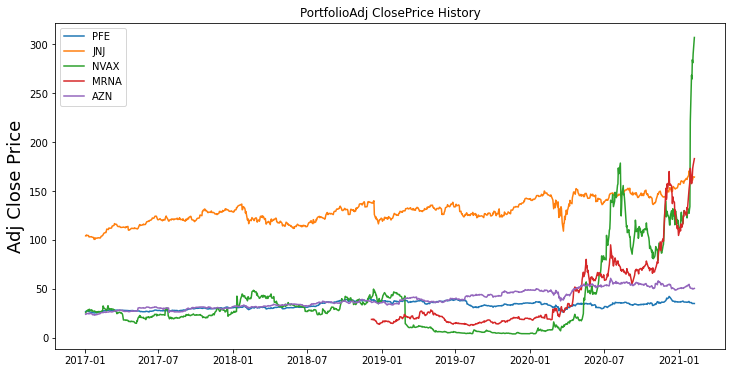

In [21]:
showGraph(stockSymbols)

In [22]:
(26.887 /26.653324)-1 

0.00876723668687629

In [23]:
#calculate simple return
#new price / old price of time period - 1
daily_simple_returns = my_stocks.pct_change(1)
#show simple returns
daily_simple_returns

Symbols,PFE,JNJ,NVAX,MRNA,AZN
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008788,-0.001640,0.031496,NaN,0.007939
2017-01-05,0.009612,0.010463,0.007634,NaN,0.027211
2017-01-06,-0.003868,-0.004792,0.037879,NaN,-0.009062
2017-01-09,-0.000299,-0.000172,0.036496,NaN,0.003517
...,...,...,...,...,...
2021-02-02,-0.022626,-0.008973,-0.014499,0.006985,-0.006746
2021-02-03,-0.004287,-0.004651,0.074884,0.045907,-0.001199
2021-02-04,0.001435,0.009284,-0.011576,0.044917,0.007200


In [24]:
daily_simple_returns.std()

Symbols
PFE     0.014531
JNJ     0.013337
NVAX    0.077185
MRNA    0.052453
AZN     0.016495
dtype: float64

Text(0, 0.5, 'Daily Simple Returns')

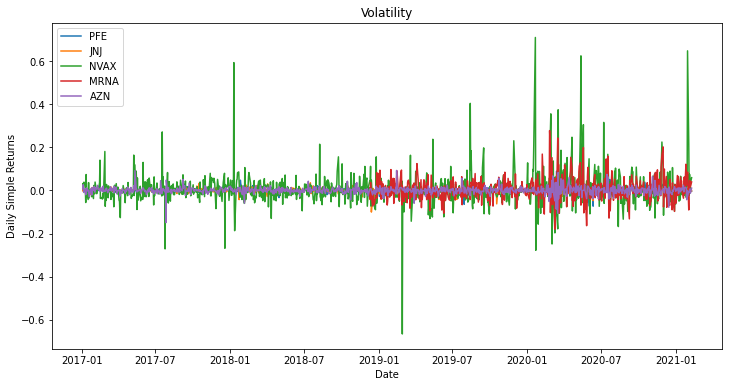

In [25]:
"""
NVAX is very volatile
MRNA is very volatile

"""
#visualize stocks daily returns
plt.figure(figsize=(12,6))
#loop through each stock and plot simple returns
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index, daily_simple_returns[c], label=c)
#plt.title(title)
#plt.ylabel(col + ' Price', fontsize=18)
plt.legend(loc='upper left', fontsize=10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')


In [28]:
def multiple_stock_data(ticker=None, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)
        #df_cov= df_1.cov()
#         df_std = df_1[stock_value].std()
        
        if plot==True:
#             for c in df_std:
            plt.plot(df_1)
            plt.title("Stock Adjusted Price Historical Data")
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        
        return df_1
        
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'

In [31]:
vol = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN']], start='2019',end='2021',plot=False, stock_value='Adj Close')
vol

Symbols,PFE,JNJ,NVAX,MRNA,AZN
Date,,,,,
2019-01-02,37.603287,120.959183,39.400002,15.330000,35.559563
2019-01-03,36.551258,119.037086,40.799999,15.500000,36.058155
2019-01-04,37.385921,121.034927,42.799999,16.959999,36.857777
2019-01-07,37.585892,120.258514,45.200001,16.270000,36.481483
2019-01-08,37.759781,123.051704,46.000000,16.950001,35.870007
...,...,...,...,...,...
2020-12-24,36.868916,152.470001,129.339996,123.389999,48.520000
2020-12-28,36.423756,153.190002,116.849998,111.400002,49.380001
2020-12-29,36.651279,154.139999,120.269997,114.389999,49.900002


In [37]:
(36.551258/37.603287) -1

-0.027977048921281944

In [33]:
daily_simple_returns = vol.pct_change(1)
daily_simple_returns

Symbols,PFE,JNJ,NVAX,MRNA,AZN
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.027977,-0.015890,0.035533,0.011089,0.014021
2019-01-04,0.022835,0.016783,0.049020,0.094193,0.022176
2019-01-07,0.005349,-0.006415,0.056075,-0.040684,-0.010209
2019-01-08,0.004626,0.023227,0.017699,0.041795,-0.016761
...,...,...,...,...,...
2020-12-24,-0.004541,0.003488,0.013239,-0.053322,-0.005126
2020-12-28,-0.012074,0.004722,-0.096567,-0.097172,0.017725
2020-12-29,0.006247,0.006201,0.029268,0.026840,0.010531


Text(0, 0.5, 'Daily Simple Returns')

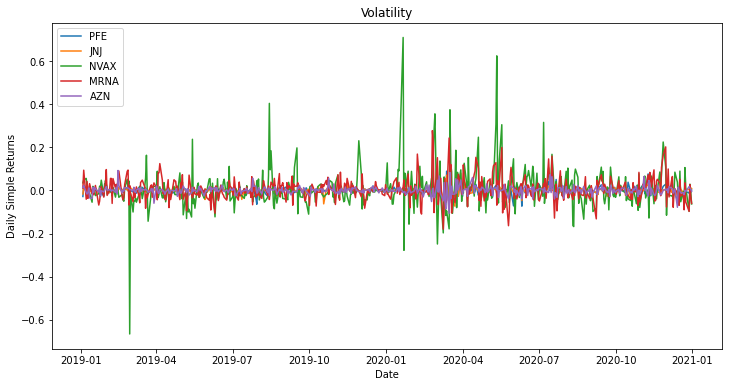

In [34]:
#visualize stocks daily returns
plt.figure(figsize=(12,6))
#loop through each stock and plot simple returns
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index, daily_simple_returns[c], label=c)
#plt.title(title)
#plt.ylabel(col + ' Price', fontsize=18)
plt.legend(loc='upper left', fontsize=10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')


### Rate of Return
This plot shows the percentage change in the price.  This is a good graph for a shot of what the price changes have been for the stated period.  are you looking for a stock that has had stable price changes.  It's a plot of the return centered around zero. We can see that in 2019 the price only went down below 2.5% 1 time and only went up 2.5% 1 time.<br>
We can see that around March, April 2020 the plot was very noisey.  The price several times changed above 7.5% and below 7.5%.

In [ ]:
df_data = single_stock_data('PFE', start='2019',end='2021',plot=False,stock_value='Adj Close')

In [ ]:
df_data = single_stock_data('PFE', start='2019',end='2021',plot=False,stock_value='Adj Close')

In [ ]:
df_data['Change'] = np.log(df_data['Close'] / df_data['Close'].shift())

In [ ]:
df_data['Change'].plot(figsize=(12,6))

### Rolling Historical Volatility
Gives us a picture of the price volatility for stated time.  The number that's usually used is 21 days because there are 21 trading days on average which 252 trading days per year. We can see that in early 2020 the price was highly volatile as compared to 2019 where there was some price changes. 

In [ ]:
df_data['Volatility'] = df_data['Change'].rolling(21).std().shift()

In [ ]:
df_data['Volatility'].plot(figsize=(12,6));

### Simple Return

### **Price Trends**
we will divide each of the rows in the DataFrame by the first row. This will enable comparison across stocks since all stock prices will be shown as a percentage difference over time. A value lower than 1 indicates that the stock price has declined compared to the base date (i.e. 2017–10–04). A value higher than 1 indicates that the price has gone up.<br>
Since prices are shown as a percentage of the first data point, the graph is specially useful to compare price trends from different companies. For example, we can see that NVAX has experienced massive growth in the last few weeks while the other stock prices have been increasing steadily since 2018.

In [ ]:
def price_trend_func(ticker, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)#.reset_index()
        #divide all dataframe by first line of data to enable comparison
        histprice = df_1/df_1.iloc[0]

        if plot==True:
            histprice.plot(figsize=(12,8))
            plt.title("Stock Adjusted Price Historical Data")
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return histprice
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


In [ ]:
price_trends = price_trend_func([['PFE','JNJ','NVAX','MRNA','AZN']], plot=True, start='2019',end='2021',stock_value='Adj Close')
price_trends

In [ ]:
#df_2.to_csv('pharma_stocks.csv')

### Volume
Volume measures the number of shares traded in a stock.  Volume can be an indicator of market strength, as rising markets on increasing volume are typically viewed as strong and healthy. When prices fall on increasing volume, the trend is gathering strength to the downside. https://www.investopedia.com <br> 
Pfizer- The plot shows that there was a big spike around in 11/20.  The data shows that on 11/9/20 there was significant volume of trading in the stock in the amount of 230,153,864 trades.  Whereas on 11/6/20 there were 23,870,676 trades. This spike in volume of trades warrants further investigation.  On 11/10/20 the volume did decrease but it was still higher than before 11/9/20 in the amount of 80,091,668.  In addition, the data shows taht that Closing Prce increased to $36.791409 from 34.163448. <br> 
<br>
On 11/9/20 we find that Pfizer posted the following tweet on twitteer
> UPDATE: We are proud to announce, along with @BioNTech_Group, that our mRNA-based #vaccine candidate has, at an interim analysis, demonstrated initial evidence of efficacy against #COVID19 in participants without prior evidence of SARS-CoV-2 infection.

In [ ]:
# vol = data_plot([['PFE','JNJ','NVAX','MRNA','AZN']], plot=True, start='2019',end='2021',stock_value='Volume')
# vol
stock_vol = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2020',end='2021',plot=True, stock_value='Volume')
pd.set_option('display.max_rows', None)
stock_vol

In [ ]:
df_1 = single_stock_data('PFE', start='2019',end='2021',plot=True,stock_value='Adj Close')

### Market Cap
Which company might be more valuable than the other.Represent the total money traded. It's a representation of the total amount of money being traded. 

In [ ]:
market_cap = web.DataReader('PFE','yahoo','2018','2021')
market_cap['Total_Traded'] = market_cap['Open'] * market_cap['Volume']
market_cap

In [ ]:
market_cap.plot()

In [ ]:
market_cap_pfe = web.DataReader('PFE','yahoo','2018','2021')
market_cap_jnj = web.DataReader('JNJ','yahoo','2018','2021')
market_cap_nvax = web.DataReader('NVAX','yahoo','2018','2021')
market_cap_bntx = web.DataReader('BNTX','yahoo','2018','2021')
market_cap_mrna = web.DataReader('MRNA','yahoo','2018','2021')

In [ ]:
market_cap_pfe['Total_Traded'] = market_cap_pfe['Open'] * market_cap_pfe['Volume']
market_cap_jnj['Total_Traded'] = market_cap_jnj['Open'] * market_cap_jnj['Volume']
market_cap_nvax['Total_Traded'] = market_cap_nvax['Open'] * market_cap_nvax['Volume']
market_cap_bntx['Total_Traded'] = market_cap_bntx['Open'] * market_cap_bntx['Volume']
market_cap_mrna['Total_Traded'] = market_cap_mrna['Open'] * market_cap_bntx['Volume']

In [ ]:
market_cap_pfe.head()

In [ ]:
market_cap_pfe['Total_Traded'].plot(label='Pfizer',figsize=(12,6))
market_cap_jnj['Total_Traded'].plot(label='JNJ',figsize=(12,6))
market_cap_nvax['Total_Traded'].plot(label='NVAX',figsize=(12,6))
market_cap_bntx['Total_Traded'].plot(label='BNTX',figsize=(12,6))
market_cap_mrna['Total_Traded'].plot(label='MRNA',figsize=(12,6))
plt.ylabel('Total Traded')
plt.legend();

In [ ]:
"""
looks like there was lots of $ traded for Pfizer around 12/20
"""
market_cap_pfe['Total_Traded'].argmax()

In [ ]:
market_cap_pfe.iloc[[market_cap_pfe['Total_Traded'].argmax()]]

### Daily Percentage Change
Not helpful for predicting future values of stock. Helpful for analyzing the volatility of a stock.Which stocks are more stable? If yo uwant to invest in stocks that are stable don't want volatility. Maybe yo don't want alot of risk. If you're goal of stability in the long run.
<br>

In [ ]:
daily_change_pfe = web.DataReader('PFE','yahoo','2018','2021')
daily_change_jnj = web.DataReader('JNJ','yahoo','2018','2021')
daily_change_nvax = web.DataReader('NVAX','yahoo','2018','2021')
daily_change_bntx = web.DataReader('BNTX','yahoo','2018','2021')
daily_change_mrna = web.DataReader('MRNA','yahoo','2018','2021')

In [ ]:
daily_change_pfe['returns'] = (daily_change_pfe['Close'] / daily_change_pfe['Close'].shift(1))-1 
daily_change_jnj['returns'] = (daily_change_jnj['Close'] / daily_change_jnj['Close'].shift(1))-1 
daily_change_nvax['returns'] = (daily_change_nvax['Close'] / daily_change_nvax['Close'].shift(1))-1 
daily_change_bntx['returns'] = (daily_change_bntx['Close'] / daily_change_bntx['Close'].shift(1))-1 
daily_change_mrna['returns'] = (daily_change_mrna['Close'] / daily_change_mrna['Close'].shift(1))-1 

In [ ]:
"""
Histogram
the fatter it is the more volatile
The higher it is the more variance we have
The higher the standard deviation is the higher the vairance is the more volatility we have
NVAX is wider than others b/c it's more volatile
"""
daily_change_pfe['returns'].hist(bins=50,label='Pfizer', alpha=0.5, figsize=(15,8)) 
daily_change_jnj['returns'].hist(bins=50, label='JNJ', alpha=0.5) 
daily_change_nvax['returns'].hist(bins=50, label='NVAX', alpha=0.5)
daily_change_bntx['returns'].hist(bins=50, label='BNTX', alpha=0.5) 
daily_change_mrna['returns'].hist(bins=50, label='MRNA', alpha=0.5)
plt.legend()

In [ ]:
"""
daily percentage change or return
daily percentage change or return of nvax is spread out, so over tim period nvax seems to be more volatile
"""
box_df = pd.concat([daily_change_pfe['returns'],daily_change_jnj['returns'],daily_change_nvax['returns'],daily_change_bntx['returns'],
                       daily_change_mrna['returns']],axis=1)
box_df.columns=['pfe_returns','jnj_returns','nvax_returns','bntx_returns','mrna_returns']
box_df.plot(kind='box', figsize=(12,8))

### Cumulative Return
I invest $1 back in 2019. How much would it be worth today?

## 2  Daily Price Change

In [ ]:
def diff_data_plot(ticker, start=None, end=None,plot=True, stock_value=None):
 
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
#             data_price_change['Price Change'] = data[stock_value].diff()
#             data_price_change.dropna()
            data[stock_value] = data[stock_value].diff()
            data.dropna()  
        df_1 = pd.DataFrame(data)#.reset_index()
        df_1
        if plot==True:
            #df_1_diff = df_1.diff()
            plt.figure(figsize=(12,6))
            plt.plot(df_1['Price Change'])
            plt.title("Historical Stock Price Change")
            #plt.set(title=f'Housing Prices by Year - {zip_df.index.freq}')
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices USD ($)')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'
            

In [ ]:
# diff_data_plot([['PFE','JNJ','NVAX','MRNA','AZN']], plot=True)
# diff_data_plot
df_1 = diff_data_plot('MRNA', start='2019',end='2021',plot=True,stock_value='Adj Close')

### Impact of Social Media on Stock Prices
Pfizer we can see that in November and December 2020 there was a significant jumpy in the price of the stock and volume of trading.

## Technical Indicators for Quantative Trading
1. Simple Moving Average
2. Average True Range

### Simple Moving Average
Simple Moving Average is one of the most common technical indicators.  SMA calculates the average of prices over a given interval of time and is used to determine the trend of the stock.<br>
The most commonly used moving averages are the 5-day, 10-day, 20-day, 50-day, and the 200-day moving averages.<br>
SMA takes hte prcie of stock over a certain number of periods and averages the price together. This is useful when trying to identify trends. Sometimres we can identify these trend changes when the SMA closing price drops over.  What this means for a ninvestor is that the closing price differes greatly frm the simple moving averageso it may be time to buy or sell as stock.<br>

In [ ]:
# df_sma = single_stock_data('TSLA', start='2019',end='2021',stock_value='Adj Close')
# df_sma
df_sma = single_stock_data('PFE', start='2020-01-01',end='2021-1-11',stock_value='Adj Close')
df_sma

In [ ]:
"""
program uses the 3 moving averages crossoever stategy to determine when to buy and sell stock. 
calculate 3 moving averages
"""
#short or fast exponential moving average
shortEMA = df_sma['Adj Close'].ewm(span=5, adjust=False).mean()
#calcualte middle/medium exponential moving average
middleEMA = df_sma['Adj Close'].ewm(span=21, adjust=False).mean()
#calculte long/slow exponential moving average
longEMA= df_sma['Adj Close'].ewm(span=63, adjust=False).mean()

In [ ]:
#visualize adj closing pprice and exponential moving averages

In [ ]:
"""
concerned w/crossing of exponential averages
this strategy tells us when to buy and when to sell the stock
"""
pd.options.plotting.backend = "plotly"
df_sma.plot(template='plotly_dark')

plt.figure(figsize=(12,6))
plt.plot(df_sma['Adj Close'],label='Adj Close',color='blue')
plt.plot(shortEMA, label='Short/Fast',color='red')
plt.plot(middleEMA,label='Middle',color='orange')
plt.plot(longEMA,label='Long/slow',color='green')


In [ ]:
pd.options.plotting.backend = "plotly"
df_sma.plot(template='plotly_dark')
# fig = px.line(df_sma, x=df_sma.index, y='Adj Close')
# fig = px.line(shortEMA, x=shortEMA.index, y='Adj Close')
# fig

In [ ]:
shortEMA

In [ ]:
import plotly.graph_objs as go

In [ ]:
# fig = px.line(df_sma, x=df_sma.index, y='Adj Close')
# fig.update_layout(title='Productivity, Europe' , showlegend=False)


# # Plotly figure 2
# fig2 = go.Figure(fig.add_traces(
#                  data=px.line(shortEMA, x=shortEMA.index, y='Adj Close')))
# fig2.update_layout(title='Productivity, Europe and America', showlegend=False)

In [ ]:
#calculate when to buy and sell
#add exponential moving averages to teh data set
df_sma['Short'] = shortEMA
df_sma['Middle'] = middleEMA
df_sma['Long'] = longEMA

In [ ]:
df_sma.head()

In [ ]:
#create the function buy and sell stock
def buy_sell_stock(data):
    buy_list = []
    sell_list = []
    flag_long=False  #flags tell which portion of stratgy I'm in
    flag_short=False
    
    for i in range(0,len(data)): #loop through and find all times that strategy applies
        #when to buy stock
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Adj Close'][i])
            sell_list.append(np.nan)
            flag_short = True
        #when to sell stock
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Adj Close'][i])
            buy_list.append(np.nan)
            flag_short = False  
                                 
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Adj Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        #when to sell stock
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Adj Close'][i])
            buy_list.append(np.nan)
            flag_long = False  
        else:
            buy_list.append(np.nan) 
            sell_list.append(np.nan) 
    return (buy_list,sell_list)                             

In [ ]:
#add buy and sell signals to dataset
df_sma['Buy'] = buy_sell_stock(df_sma)[0]
df_sma['Sell'] = buy_sell_stock(df_sma)[1] #return index1

In [ ]:
df_sma.head()

In [ ]:
#visaully show stock buy and sell signals
plt.figure(figsize=(12,6))
plt.title('Buy and Sell Chart')
plt.plot(df_sma['Adj Close'],label='Adj Close',color='blue',alpha=0.35)
plt.plot(shortEMA, label='Short/Fast',color='red',alpha=0.35)
plt.plot(middleEMA,label='Middle',color='orange',alpha=0.35)
plt.plot(longEMA,label='Long/slow',color='green')
plt.scatter(df_sma.index,df_sma['Buy'],color='green',marker='^',alpha=1) #show momentum stock going up
plt.scatter(df_sma.index,df_sma['Sell'],color='red',marker='v',alpha=1) #show momentum stock going up


## **Forecasting**
### Long Short Term Memory (LSTM)

In [ ]:
def get_data(symbol, data_source,start,end):
    df = web.DataReader(symbol,data_source, start, end) 
    #print('Dataset consisits of {} and {}'.format(df[0].shape,df[1].shape))
    df_shape = df.shape
    print('Dataframe consists of {} rows and {} columns'.format(df_shape[0],df_shape[1]))
    
    plt.figure(figsize=(12,8))
    plt.plot(df['Adj Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    return df

In [ ]:
the_data = get_data('MRNA',data_source='yahoo', start='2019-01-01',end='2021-1-11')
the_data

In [ ]:
diff_df = the_data.copy()

In [ ]:
#change in price for day
#radio button or drop down
the_data.diff()['Adj Close'].plot()

In [ ]:
diff_df['Prct_Change'] = the_data.diff().dropna()['Adj Close']

In [ ]:
diff_df.head()

In [ ]:
#df = pd.read_csv('data/apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])

#Get the stock quote 
#df = web.DataReader('TGT', data_source='yahoo', start='2016-01-01', end='2021-1-11') 

In [ ]:
#df = df.diff().dropna() #zip_df[11226].diff().dropna()

In [ ]:
def preprocessing(df,percentage):
    training_data_len = int(np.round(len(df) * percentage))
    dataset = pd.DataFrame(df)
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(dataset)
    return training_data_len, dataset, scaler, scaled_data

In [ ]:
#training_data_len, dataset, scaler, scaled_data = preprocessing(df['Close'], percentage=.8)
training_data_len, dataset, scaler, scaled_data = preprocessing(the_data['Adj Close'], percentage=.8)

In [ ]:
def create_sets(training_data_len):
    #create training data set
    train_data = scaled_data[0:training_data_len,:]
    test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
    #split data into X_train and y_train data sets
    X_train = []
    y_train = []
    #create dataset X_test and y_test data sets
    X_test = []
    y_test = []    #dataset.iloc[training_data_len:, :]


    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i])
        y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60

    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i,0]) 
        y_test.append(test_data[i,0])
        
    X_train, y_train = np.array(X_train), np.array(y_train)  
    X_test = np.array(X_test) #added
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) #added
    y_test = np.array(y_test)
        
    return X_train, X_test, y_train, y_test    

In [ ]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss', patience=2)

def create_model(X_train, y_train):
    model = Sequential()

    model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = False))
    model.add(Dropout(0.2))

    model.add(Dense(units = 25))
    model.add(Dense(units = 1))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.summary()
    
    return model


In [ ]:

model = create_model(X_train,y_train)

In [ ]:
#callbacks=[early_stop]
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop])     

In [ ]:
def save_model():
    model.save('model_parameters')
    model_params = keras.models.load_model('model_parameters')
    model_params.summary()

    return model_params

In [ ]:
model_params = save_model()

In [ ]:
def make_prediction(model, X_test, y_test,training_data_len):
    predictions = model.predict(X_test)
    prediction_unscaled = scaler.inverse_transform(predictions) #unscaling the values
    
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1,1)) #unscaling the values
    
    #this is in dollars
    rmse_predictions = np.sqrt(np.mean(prediction_unscaled -y_test_unscaled)**2)
    rmse_predictions
    
    predictions = pd.DataFrame(prediction_unscaled, columns=['Predictions'])
    
    train = dataset[:training_data_len]
    valid = dataset[training_data_len:] #data from index training_data_len to 
    
    valid.reset_index(inplace=True)
    valid['Prediction'] = predictions['Predictions']
    valid1 = valid.set_index('Date')
    
    plt.figure(figsize=(12,8))
    plt.title('Model')
    plt.xlabel('Label')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Adj Close'])
    #plt.plot(valid[['Close','Predictions']])
    plt.plot(valid1['Adj Close'])
    plt.plot(valid1['Prediction'])
    # #valid[['Close','Predictions']].plot()
    plt.legend(['Train','Valid','Predictions'],loc='lower right')
    return rmse_predictions, valid1
    

In [ ]:
make_prediction(model, X_test,y_test, training_data_len )

In [ ]:
from sklearn import metrics

In [ ]:
"""
blue-data model was trainined on 
orange-actual closing stock price for rest of days
green-what model predcited values to be

predict closing price fo TGT stock for 2021-1-11  199.10

get the quote
"""
def get_quote(new_df):
    #get last 60days closing values and convert datframe to an array
    last_60_days = new_df[-60:].values #converts to array
    #scale data
    last_60_days_scaled = scaler.transform(last_60_days)
    #create empty list
    x_test = []
    #append last 60 days to x_test
    x_test.append(last_60_days_scaled)
    #conert x_test to a numpy array
    x_test = np.array(x_test)
    # #reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    pred_price = model.predict(x_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price) 
    #what model thinks predicted price will be for 12/18/2019
    #the actual prcie was $69.94
    #DAL: 58.58, 2021-1-11 40.19
    return pred_price                    

In [ ]:
get_quote(dataset)

## New Model

In [ ]:
# the_data = get_data('AMZN',data_source='yahoo', start='2016-01-01',end='2021-1-11')
# the_data
# df_1 = get_data_plot(['AZN'], plot=True, start='2019',end='2021',stock_value='Adj Close')
# df_1
the_data_1 = get_data('TGT',data_source='yahoo', start='2019-01-01',end='2021-1-11')
the_data_1

In [ ]:
training_data_len, dataset, scaler, scaled_data = preprocessing(the_data_1['Adj Close'], percentage=.8)

In [ ]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

In [ ]:
model_params.summary()

In [ ]:
#model.fit(X_train,y_train, epochs=50,batch_size=32,callbacks=[early_stop])  

In [ ]:
make_prediction(model_params, X_test,y_test, training_data_len )

In [ ]:
get_quote(dataset)

## SARIMA MODEL
A time series is a sequence where we record a metric over regular intervals.  Forecasting is the future value that this sequence will take.<br>
An ARIMA model is a forecasting algorithm that takes in previous past values to predict future values.  ARIMA models use past performance to predict future performance.  Based on its own lag and lag errors.  A SARIMA model is an ARIMA model with a seasonality component.<br>

In [ ]:
"""
ARIMA is a forecasting model based on idea that information of past values may be indicative of future values.
ARIMA explains a ts based on its own past values, basically its own lags and lagged forecast errors.
"""
# df_2 = web.DataReader('MRNA','yahoo','2019','2021')
# df_2
# df_1 = get_data_plot(ticker='AMZN', start='2019',end='2021',plot=True, stock_value='Adj Close')
# df_1
# data_sarima = get_data('MRNA',data_source='yahoo', start='2019-01-01',end='2021-1-11')
# data_sarima
the_data_1

In [ ]:
#type(df_2)

In [ ]:
#df_data = df_2.copy()
df_data = pd.DataFrame(the_data_1['Adj Close'])

In [ ]:
df_data.head()

In [ ]:
df_data.info()

## Train Test Split

In [ ]:
#training_data_len, dataset, scaler, scaled_data = preprocessing(df_data['Adj Close'], percentage=.8)
n = int(len(df_data) * 0.8)
train = df_data[:n]
test = df_data[n:]

In [ ]:
#1265
len(train), len(test)

In [ ]:
train.head()

In [ ]:
plt.plot(df_data.index, df_data["Adj Close"])

In [ ]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
import pmdarima as pm
from pmdarima import auto_arima

In [ ]:
"""
Need to find optimal parameters so you can fit ARIMA model.
Forecasting using optimal parameters
"""
def arima_model(df):
    """
    df- dataframe
    function is a gridsearch to get optimal p,d,qs and lowest AIC for the model.
    q-is moving average
    """
    autoarima_model = auto_arima(df, start_p = 0, start_q = 0, #start_q = 0
                              test='adf',             # use adftest to find optimal 'd'
                              max_p = 3, max_q = 3,   # maximum p and q
                              m = 12,                  #frequency of series 
                              d = None,               # let model determine 'd', was 1
                              seasonal = True, 
                              start_P=0, D=1, trace = False, #start  #trace= True
                              error_action ='ignore',   # we don't want to know if an order does not work 
                              suppress_warnings = True,  # we don't want convergence warnings 
                              stepwise = True)           # set to stepwise  
    
    #print('\n')
    #display(autoarima_model.summary())
    
    return autoarima_model


In [ ]:
train.shape, test.shape

In [ ]:
stepwise_fit = arima_model(train['Adj Close'])

In [ ]:
stepwise_fit.summary()

In [ ]:
arima_list = [['zipcode', 'pdq','seasonal_pdq','aic']] 
for col in df_data.columns:
  zip_test_2 = arima_model(df_data[col])
  arima_list.append([col,zip_test_2.order, zip_test_2.seasonal_order, zip_test_2.aic()])
#result   
output_df = pd.DataFrame(arima_list[1:],columns=arima_list[0]) 
output_df  

In [ ]:
import statsmodels.api as sm

In [ ]:
def fit_ARIMA(df, order=None, seasonal_order=None):
    """
    forecasting statsmodel SARIMAX model
    """
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df, 
                                        order=order, 
                                        seasonal_order=seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    #display / no tables 1
    display(output.summary())
    
    print('\n')
    print('MODEL DIAGNOSTICS')
    
    output.plot_diagnostics(figsize=(15, 18));
    plt.show()
    
    return output

In [ ]:
train['Adj Close'][[0,-1]]

In [ ]:
test['Adj Close'][[0,-1]]

In [ ]:
test

In [ ]:
current_zip = 'Adj Close'
zip_params= output_df[output_df['zipcode']==current_zip]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(df_data[current_zip],order=zip_params.pdq.values[0], seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2020-01-10'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
from matplotlib.pylab import rcParams

In [ ]:
"""

ax = CO2['1990':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()


"""


# rcParams['figure.figsize'] = 15, 6
# #plt.figure(figsize=(12,5))
# # Plot observed values
# ax = train['Adj Close']['2019':].plot(label='observed')#
# test['Adj Close']['2019':].plot()#label='Test'
# # Plot predicted values
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# # Plot the range for confidence intervals
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# # Set axes labels
# ax.set_xlabel('Date')
# ax.set_ylabel('Sale Price')
# plt.legend()


In [ ]:
# # Get the real and predicted values
# forecasted_11238 = pred.predicted_mean
# truth_1128 =test['Adj Close']['1996':]

# # Compute the root mean square error
# mse = ((forecasted_11238 - truth_1128) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
# #np.sqrt(np.mean((predictions-targets)**2))
# rmse = np.sqrt(np.mean((forecasted_11238 - truth_1128) ** 2))
# print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

In [ ]:
current_zip = 'Adj Close'
zip_params = output_df[output_df['zipcode']==current_zip]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(df_data[current_zip],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2020-01-10'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [ ]:
def prediction_vis(pred_dynamic,pred_dynamic_conf, y):
  # Plot the dynamic forecast with confidence intervals.
  plt.figure(figsize=(12,5))
  # Plot observed values
  ax = y.plot(label='Observed')

  # Plot predicted values
  pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=0.9)

  # Plot the range for confidence intervals
  ax.fill_between(pred_dynamic_conf.index,
                  pred_dynamic_conf.iloc[:, 0],
                  pred_dynamic_conf.iloc[:, 1], color='g', alpha=0.5)

  # Set axes labels
  ax.set_xlabel('Date')
  ax.set_ylabel('Sale Price')
  plt.legend()

  return ax

In [ ]:
# prediction_visual = prediction_vis(pred_dynamic,pred_dynamic_conf,train[current_zip])
# prediction_visual

In [ ]:
# Get the real and predicted values
forecast_11238 = pred_dynamic.predicted_mean
truth_11238 = train[current_zip]#['1996':]

# Compute the mean square error
mse = ((forecast_11238 - truth_11238) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#np.sqrt(np.mean((predictions-targets)**2))
rmse = np.sqrt(np.mean((forecast_11238 - truth_11238) ** 2))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))